In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
import os 
import re
sns.set_theme('paper')

In [46]:
pol = pd.read_csv('../misc_files/obspol.csv', skiprows=3, index_col=0)
theta = -2*pol.loc['smc_x-1/02007201']['PA']*np.pi/180

spectrum = pd.read_csv('../spectra_files/smc_x-1/02007201/spectra_0.2.csv')
rotation = np.array([
                        [np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]
                        ])
qu_vector = np.array([spectrum['Q']/spectrum['I'], spectrum['U']/spectrum['I']])
rotated_qu = np.matmul(rotation, np.array([spectrum['Q']/spectrum['I'], spectrum['U']/spectrum['I']]))
rotated_normq = rotated_qu[0]
rotated_normu = rotated_qu[1]
print(len(rotated_normq))
print(len(rotated_normu))

30
30


In [47]:

spectra_normstokes = pd.DataFrame()
obspol = pd.read_csv('../misc_files/obspol.csv', skiprows=3, index_col=0)
for source_dir in os.listdir('../spectra_files'):
    source_path = os.path.join('../spectra_files', source_dir)
    if os.path.isdir(source_path):
        for obsid_dir in os.listdir(source_path):
            obsid_path = os.path.join(source_path, obsid_dir)
            if os.path.isdir(obsid_path):
                obsid_trimmed = f'{obsid_path.split('/')[-2]}/{obsid_path.split('/')[-1]}'
                if obsid_trimmed != 'her_x-1/01001899': # for some reason the rmf doesn't work with this one
                    print(f'Processing {obsid_trimmed}')
                    
                    spectrum = pd.read_csv(f'{obsid_path}/spectra_0.2.csv')
                    pol = obspol.loc[obsid_trimmed]
                    theta = -2*pol['PA']*np.pi/180
                    rotation = np.array([
                        [np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]
                        ])
                    qu_vector = np.array([spectrum['Q']/spectrum['I'], spectrum['U']/spectrum['I']])
                    # qu_vector = np.array([spectrum['Q'], spectrum['U']])
                    rotated_qu = np.matmul(rotation, qu_vector)
                    rotated_normq = rotated_qu[0]
                    rotated_normu = rotated_qu[1]
                    normstokes = np.concatenate([rotated_normq, rotated_normu])
                    spectra_normstokes[f'{obsid_trimmed}'] = normstokes



Processing swift_j1727/03006001
Processing swift_j1727/02251301
Processing swift_j1727/02250901
Processing swift_j1727/02251001
Processing swift_j1727/03005801
Processing swift_j1727/02251101
Processing swift_j1727/03005701
Processing swift_j1727/02251201
Processing cen_x-3/01250201
Processing cen_x-3/01006501
Processing gro_j1008-57/02003501
Processing gro_j1008-57/02003601
Processing gx_5-1/02002799
Processing gx_9+1/03003801
Processing gx_3+1/03004101
Processing v395_car/03001201
Processing gx_9+9/01002401
Processing cir_x-1/02002699
Processing lmc_x-1/02001901
Processing 4u_1735-44/03004001
Processing sco_x-1/02002401
Processing 4u_1820-303/02002399
Processing cyg_x-3/02001899
Processing cyg_x-3/02250301
Processing cyg_x-3/03250301
Processing cyg_x-3/02009101
Processing smc_x-1/02007001
Processing smc_x-1/02007101
Processing smc_x-1/02007201
Processing gx_340+0/03009901
Processing gx_340+0/03003301
Processing cyg_x-2/01001601
Processing cyg_x-2/01006601
Processing exo_2030+375/0225

In [48]:
# Assuming you have a dataframe `df` with your data
# Standardize the data before applying PCA
spectra = spectra_normstokes
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spectra.T)
# scaled_data = spectra
# Apply PCA
k = 30  # Number of components to keep
pca = PCA(n_components=k)  
# pca = PCA()  
principal_components = pca.fit_transform(scaled_data)

# Create a new dataframe with the principal components
# k = len(principal_components[0])
# columns = [f'PC{i+1}' for i in range(k)]
# pca_df = pd.DataFrame(data=principal_components, columns=columns)
# print(pca_df)

In [49]:
spectra = spectra_normstokes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spectra.T)
k = 60  # Number of components to keep
pca = PCA(n_components=k)  
principal_components = pca.fit(scaled_data)
pcs = principal_components.components_
print(np.shape(pcs))

(60, 60)


In [50]:
# # Create a new dataframe with the principal components
# columns = [f'PC{i+1}' for i in range(k)]
# pca_df = pd.DataFrame(data=principal_components, columns=columns)
# print(pca_df)

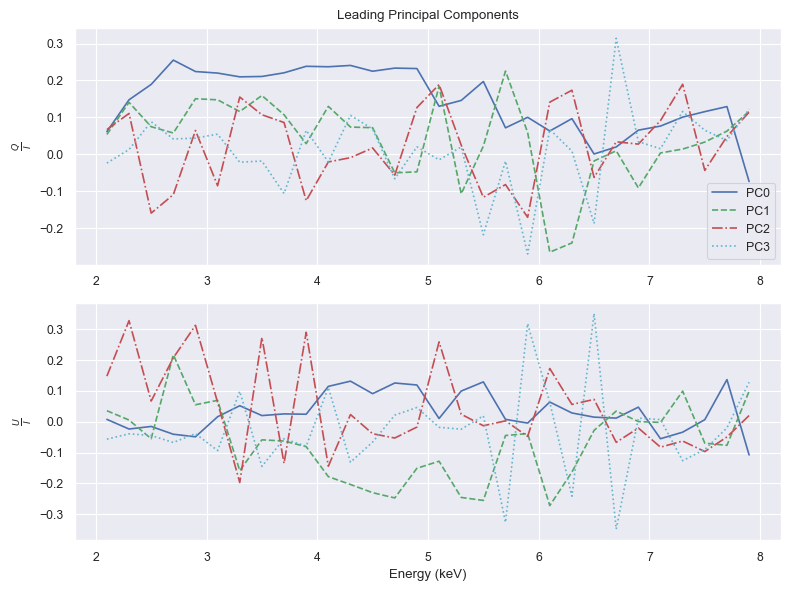

In [57]:
# Plot the leading two principal components

fig, ax = plt.subplots(2,1,figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
linestyles = ['-', '--', '-.', ':']
K = 4
stokes = ['Q/I', 'U/I']
for i, stokes in enumerate(stokes):
    for j in range(K):
        ax[i].plot(spectrum['energy'], pcs[j][30*i:30*(i+1)], label=f'PC{j}', linestyle=linestyles[j], color=colors[j])
    ax[i].set_ylabel(f'{stokes}')
# ax.plot(spectrum['energy'], pcs[1]-(pcs[3]-pcs[2]), label='PC2-PC4', linestyle='solid', color='k')
ax[1].set_xlabel('Energy (keV)')
ax[0].set_ylabel(r'$\frac{Q}{I}$')
ax[1].set_ylabel(r'$\frac{U}{I}$')
ax[0].legend()
ax[0].set_title('Leading Principal Components')
fig.tight_layout()

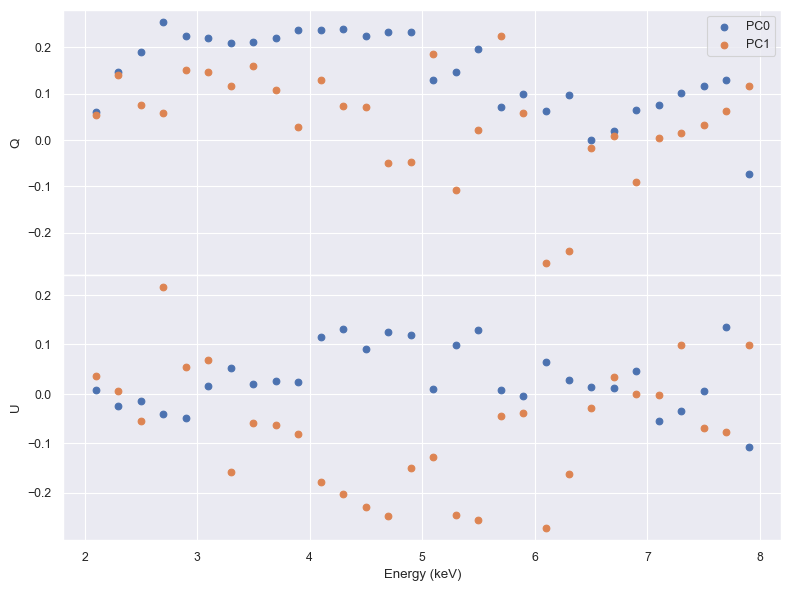

In [ ]:
# Plot the leading two principal components


stokes = ['Q', 'U']
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
K=2
for i, stokes in enumerate(stokes):
    for j in range(K):
        ax[i].scatter(spectrum['energy'], pcs[j][30*i:30*(i+1)], label=f'PC{j}')
    ax[i].set_ylabel(f'{stokes}')
ax[1].set_xlabel('Energy (keV)')
ax[0].legend()
plt.tight_layout()
plt.subplots_adjust(hspace=0)

Fitted parameters: a = 0.22755936757063452, b = 1.2422327718215842


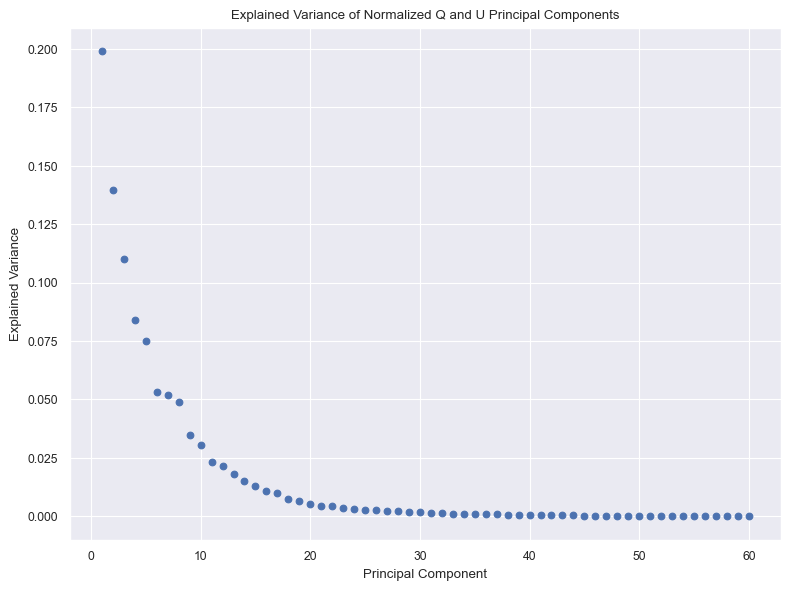

In [ ]:
def exponential(x, a, b):
    return a * np.power(b, -x)

def fit_exponential(x_data, y_data):
    """
    Parameters:
    x_data (array-like): The independent variable data.
    y_data (array-like): The dependent variable data.

    Returns:
    tuple: The optimal values for the parameters a and b.
    """
    params, _ = curve_fit(exponential, x_data, y_data)
    return params

x = np.array(range(1, len(pca.explained_variance_ratio_)+1))
a, b = fit_exponential(x, pca.explained_variance_ratio_)
print(f"Fitted parameters: a = {a}, b = {b}")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(x, pca.explained_variance_ratio_, label='Explained Variance')
# ax.plot(x, exponential(x, a, b), label='Fit')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_yscale('linear')
ax.set_title('Explained Variance of Normalized Q and U Principal Components')
# ax.set_ylim(1e-4, 1)
fig.tight_layout()

Fitted parameters: a = -0.06493161000104596, b = 2.845876836873899


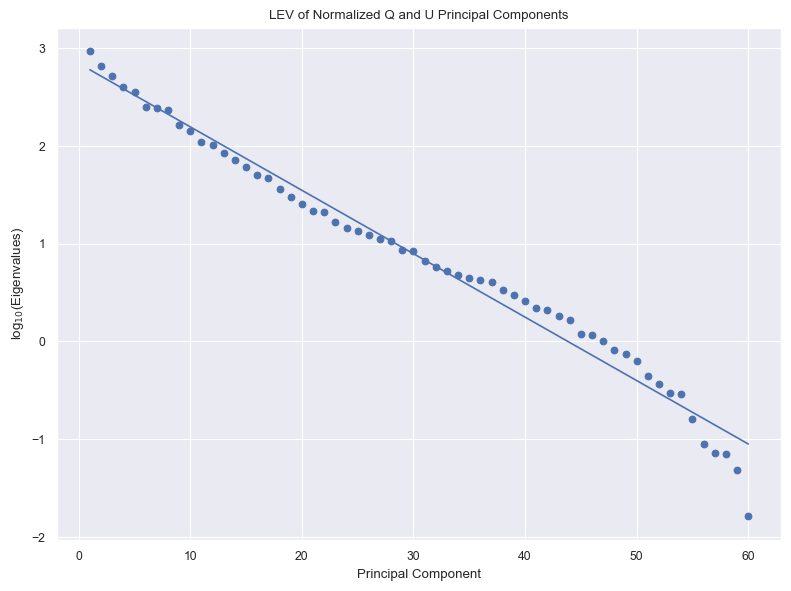

In [ ]:
def line(x, a, b):
    return a * x + b

def fit_line(x_data, y_data):
    """
    Parameters:
    x_data (array-like): The independent variable data.
    y_data (array-like): The dependent variable data.

    Returns:
    tuple: The optimal values for the parameters a and b.
    """
    params, _ = curve_fit(line, x_data, y_data)
    return params

l = 0
eigenvalues = pca.singular_values_**2
x = np.array(range(1, len(eigenvalues)+1))
a, b = fit_line(x[l:], np.log10(eigenvalues[l:]))
print(f"Fitted parameters: a = {a}, b = {b}")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(x, np.log10(eigenvalues), label='Explained Variance')
ax.plot(x, line(x, a, b), label='Fit')
ax.set_xlabel('Principal Component')
ax.set_ylabel(r'log$_{10}$(Eigenvalues)')
ax.set_yscale('linear')
ax.set_title('LEV of Normalized Q and U Principal Components')
# ax.set_ylim(1e-4, 1)
fig.tight_layout()

Fitted parameters: a = 30.093244717379253, b = 1.0918951327576416


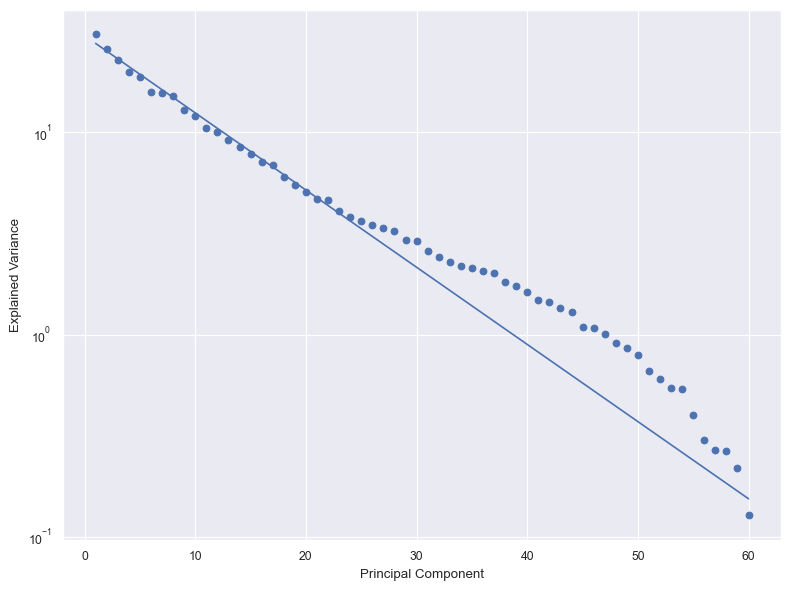

In [ ]:
x = np.array(range(1, len(pca.singular_values_)+1))
a, b = fit_exponential(x, pca.singular_values_)
print(f"Fitted parameters: a = {a}, b = {b}")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(x, pca.singular_values_, label='Explained Variance')
ax.plot(x, exponential(x, a, b), label='Fit')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_yscale('log')
# ax.set_ylim(1e-4, 1)
fig.tight_layout()

In [ ]:
def project_onto_pcs(test_data_point, pcs, k):
    """
    Projects a test data point onto the first k principal components.

    Parameters:
    test_data_point (array-like): The test data point to be projected.
    pcs (array-like): The principal components, shape (n, m).
    k (int): The number of principal components to project onto.

    Returns:
    array-like: The projection of the test data point onto the first k principal components.
    """
    # Ensure k does not exceed the number of principal components
    k = min(k, pcs.shape[0])
    
    # Select the first k principal components
    selected_pcs = pcs[:k, :]
    
    # Project the test data point onto the selected principal components
    projection = np.dot(selected_pcs, test_data_point)
    
    return projection

# Example usage
test_data_point = spectra.iloc[:, -3]
# test_data_point = spectra.iloc[:, 10]
test_data_point /= np.linalg.norm(test_data_point)
for k in range(1, 61):
    # k = 60  # Number of principal components to project onto

    projection = project_onto_pcs(test_data_point, pcs, k)
    projection_vectors = [projection[i] * pcs[i] for i in range(k)]
    reconstructed_data_point = np.sum(projection_vectors, axis=0)
    # print(reconstructed_data_point)
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    for i in range(2):
        ax[i].plot(spectrum['energy'], test_data_point[i*30:(i+1)*30], label='Original')
        ax[i].plot(spectrum['energy'], reconstructed_data_point[i*30:(i+1)*30], label='Projection')
    ax[1].legend()
    ax[1].set_xlabel('Energy (keV)')
    ax[0].set_ylabel('Q/I')
    ax[1].set_ylabel('U/I')
    ax[0].set_title(f'Projection onto {k} Principal Components of Normalized Q and U Spectra')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    plt.savefig(f'QUReconstructionImages/projection_{k}.png', bbox_inches='tight')
    plt.close()

In [ ]:
from scipy.optimize import curve_fit

def power_law(x, a, b, c):
    return a * np.power(x, -b) + c

def fit_power_law(x_data, y_data):
    """
    Fits data to a power-law function y = a * x^-b.

    Parameters:
    x_data (array-like): The independent variable data.
    y_data (array-like): The dependent variable data.

    Returns:
    tuple: The optimal values for the parameters a and b.
    """
    params, _ = curve_fit(power_law, x_data, y_data)
    return params

# Example usage

a, b, c = fit_power_law(spectrum['energy'], pcs[1][:30])
print(f"Fitted parameters: a = {a}, b = {b}, c = {c}")
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(spectrum['energy'], pcs[1], label='PC1')
ax.plot(spectrum['energy'], power_law(spectrum['energy'], a, b, c), label='Fit')
fig.tight_layout()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.